# Establishing a Database Connection

A series of steps illustrating how to build a database, establish a database connection, test the database connection and pull data utilizing Pisces.

## Building a Database

Data in miniseed or sac formats can be loaded into a sqlite database using commands from pisces. In this tutorial, we will build a sqlite database from a series of SAC files contained in test/data/cli

In [1]:
! pisces sac2db -h

Usage: pisces sac2db [OPTIONS] DB [FILES]...

  Scrape SAC files into database tables.

  SAC files may be used to produce the following tables: Wfdisc, Site,
  Sitechan, Origin, Event, Arrival, Assoc, Lastid, and Instrument.  Id
  numbering will follow the Lastid table, if one is found, otherwise it will
  start from 1.

  Examples -------- # use standard table names to local test.sqlite file
  pisces sac2db sqlite:///test.sqlite datadir/*.sac

  # prefix all tables in an oracle account with prefix my_, prompt for
  password pisces sac2db --prefix my_
  oracle://user@server.domain.com:port/dbname datadir/*.sac

  # if there are too many SAC files for the shell to handle, use a list:
  find datadir -name "*.sac" -print > saclist.txt sac2db.py
  sqlite:///test.sqlite saclist.txt

Options:
  -t, --tables owner.tablename[,...]
                                  Comma-separated (no spaces), list of tables
                                  to create.  Default is all core tables with
        

In [2]:
!pisces sac2db sqlite:///test.sqlite ../data/cli/*.SAC

sac2db: {'session': <sqlalchemy.orm.session.Session object at 0x7fa8b08d6b10>, 'db': 'sqlite:///test.sqlite', 'files': ('../data/cli/YJ.FSU1..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.FSU2..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.FSU3..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.FSU4..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.HWU1..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.HWU2..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.HWU3..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.HWU4..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.LCM1..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.LCM2..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.LCM3..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.LCM4..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.PSU1..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.PSU2..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.PSU3..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.PSU4..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.WMU1..EDF.M.2012.206.000000.SAC', '../data/cli/YJ.WMU2..EDF.M.20

As infrapy is an array processing tool, after your sqlite database is created, you will need to update the REFSTA for each array using update_refsta.py

In [5]:
%run ../../scripts/update_refsta.py sqlite:///test.sqlite FSU
%run ../../scripts/update_refsta.py sqlite:///test.sqlite HWU
%run ../../scripts/update_refsta.py sqlite:///test.sqlite LCM
%run ../../scripts/update_refsta.py sqlite:///test.sqlite PSU
%run ../../scripts/update_refsta.py sqlite:///test.sqlite WMU

SQLITE database
SQLITE database
SQLITE database
SQLITE database
SQLITE database


## Querying the Database

We can now connect to our database and practice querying

In [6]:
import pisces as ps

session = ps.db_connect(backend='sqlite', instance='test.sqlite')

In [7]:
session

The tables used in this tutorial are all standard CSS3.0 tables, we define these tables in order to query the database we have created.

In [8]:
from pisces.tables.css3 import Site, Wfdisc, Origin

In [9]:
q = session.query(Site).all()

In [10]:
q

[Site(sta='FSU1', ondate=-1),
 Site(sta='FSU2', ondate=-1),
 Site(sta='FSU3', ondate=-1),
 Site(sta='FSU4', ondate=-1),
 Site(sta='HWU1', ondate=-1),
 Site(sta='HWU2', ondate=-1),
 Site(sta='HWU3', ondate=-1),
 Site(sta='HWU4', ondate=-1),
 Site(sta='LCM1', ondate=-1),
 Site(sta='LCM2', ondate=-1),
 Site(sta='LCM3', ondate=-1),
 Site(sta='LCM4', ondate=-1),
 Site(sta='PSU1', ondate=-1),
 Site(sta='PSU2', ondate=-1),
 Site(sta='PSU3', ondate=-1),
 Site(sta='PSU4', ondate=-1),
 Site(sta='WMU1', ondate=-1),
 Site(sta='WMU2', ondate=-1),
 Site(sta='WMU3', ondate=-1),
 Site(sta='WMU4', ondate=-1)]

In [11]:
refsta = session.query(Site).filter(Site.refsta == 'FSU').all()

In [12]:
refsta

[Site(sta='FSU1', ondate=-1),
 Site(sta='FSU2', ondate=-1),
 Site(sta='FSU3', ondate=-1),
 Site(sta='FSU4', ondate=-1)]

### Retrieve and plot waveforms from a query

In [13]:
from pisces import wfdisc2trace, read_waveform

<IPython.core.display.Javascript object>


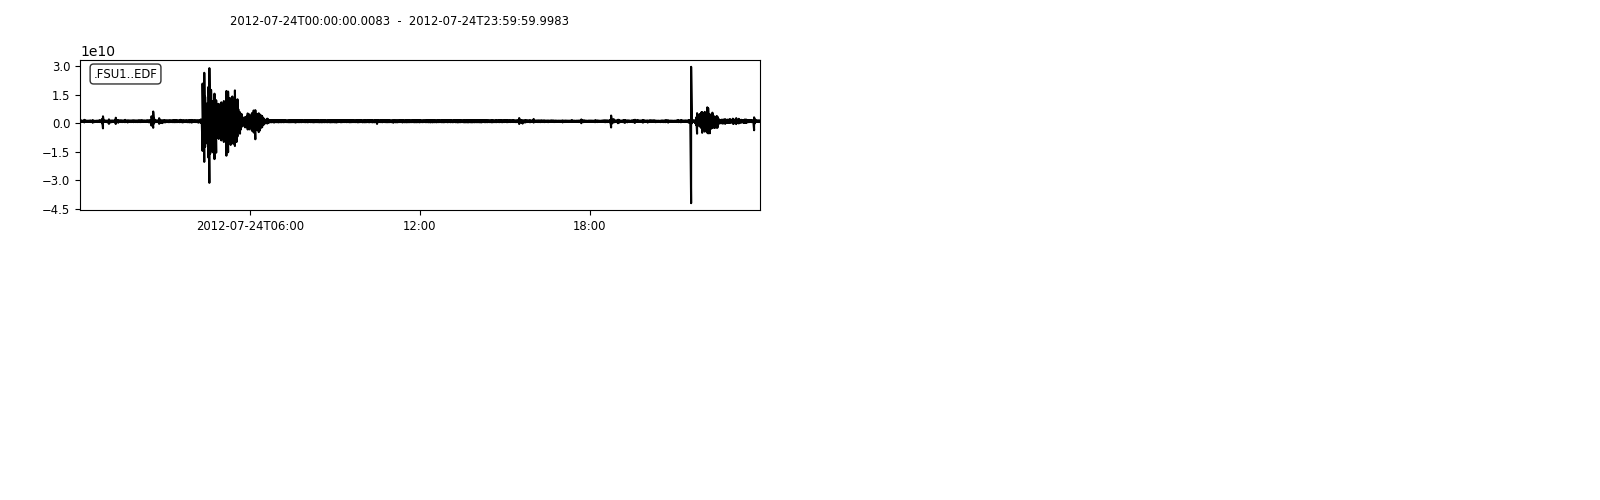

<IPython.core.display.Javascript object>


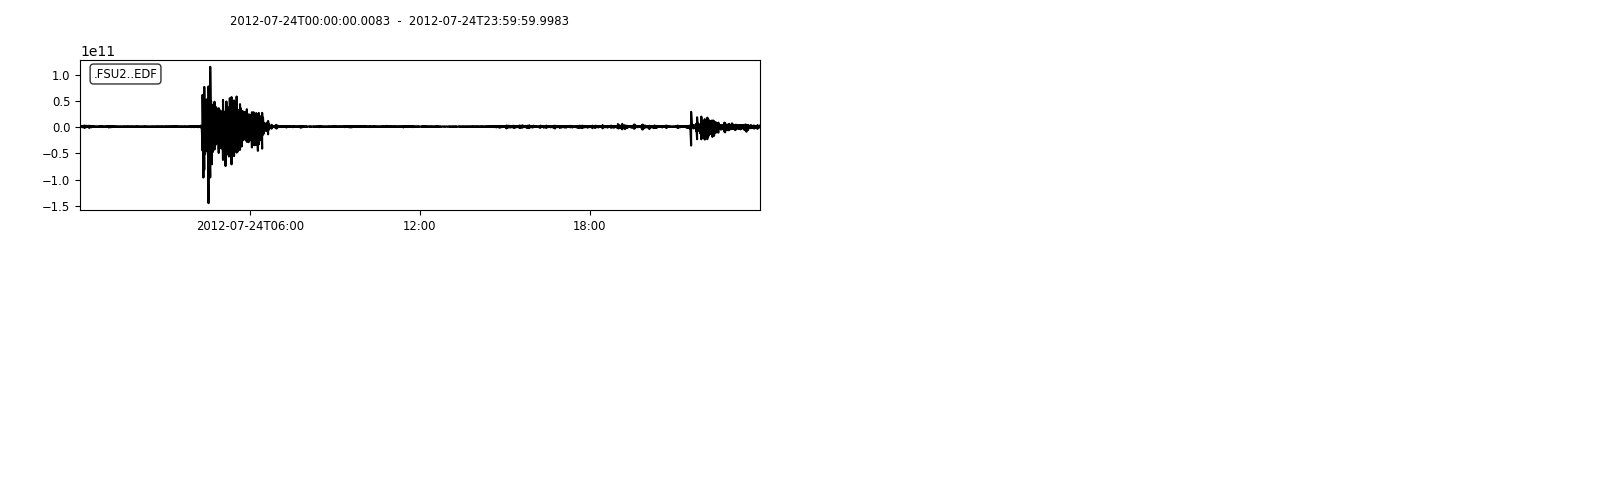

<IPython.core.display.Javascript object>


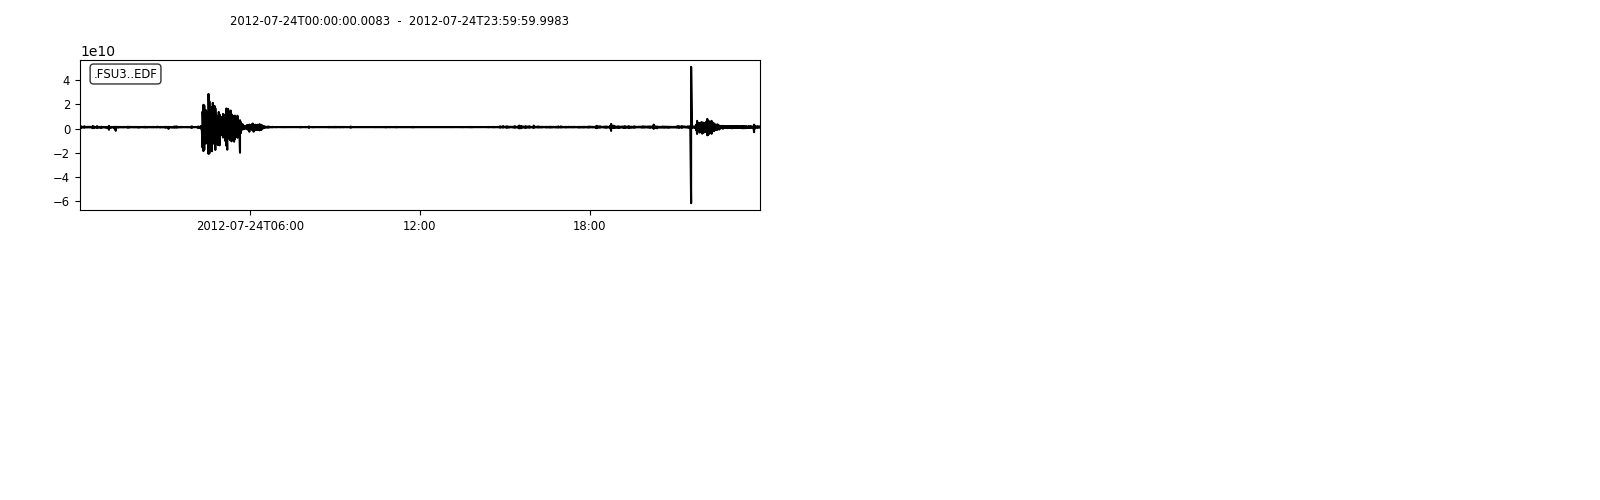

<IPython.core.display.Javascript object>


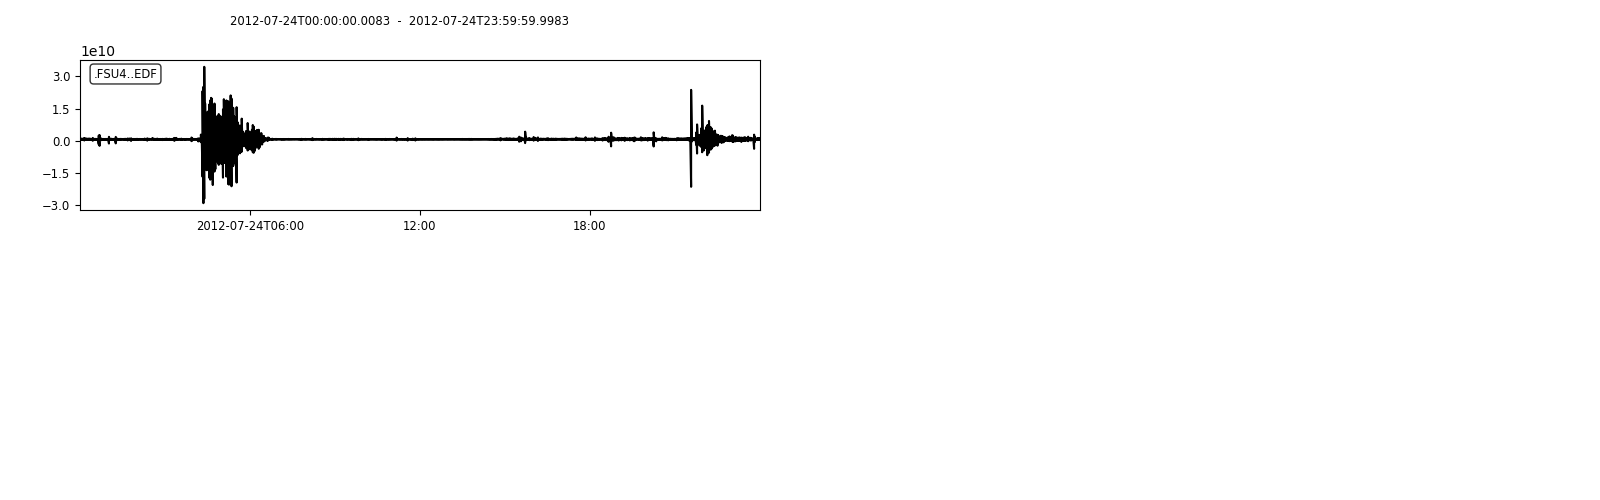

In [14]:
%matplotlib notebook
for wf in session.query(Wfdisc).filter(Wfdisc.chan == 'EDF').limit(4):
    tr = wfdisc2trace(wf)
    data = read_waveform(wf.dir + '/' + wf.dfile, wf.datatype, wf.foff, wf.nsamp)
    tr.plot()